In [2]:
import pandas as pd

# CSV 파일 경로
file_path = '/Users/jeongjanghun/Desktop/london bike/Global EV Data 2024.csv'

# 데이터프레임으로 불러오기
df = pd.read_csv(file_path)

# 데이터프레임의 첫 몇 줄을 확인
df.head()


,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00039
1,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.00650
2,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.00000
3,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.00000
4,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,220.00000


In [4]:
import pandas as pd
from sqlalchemy import create_engine

# PostgreSQL 데이터베이스 연결
engine = create_engine('postgresql://jeongjanghun@localhost:5432/mydatabase')

# CSV 파일을 pandas 데이터프레임으로 불러오기
file_path = '/Users/jeongjanghun/Desktop/london bike/Global EV Data 2024.csv'  # 실제 파일 경로
df = pd.read_csv(file_path)

# 데이터프레임을 PostgreSQL 테이블로 저장하기
df.to_sql('ev_data', engine, index=False, if_exists='replace')


654

In [12]:
import pandas as pd

# CSV 파일 경로
file_path = '/Users/jeongjanghun/Desktop/london bike/Global EV Data 2024.csv'  # 실제 파일 경로

# 데이터프레임으로 불러오기
df = pd.read_csv(file_path)

# 특정 연도(예: 2023, 2024) 데이터 확인
df_filtered = df[df['year'].isin([2023, 2024])]
print(df_filtered)


          region        category                      parameter  mode  \
84     Australia      Historical             EV charging points    EV   
85     Australia      Historical             EV charging points    EV   
86     Australia      Historical                 EV stock share  Cars   
87     Australia      Historical                       EV sales  Cars   
88     Australia      Historical                       EV stock  Cars   
...          ...             ...                            ...   ...   
12373      World  Projection-APS  Oil displacement, million lge  Vans   
12374      World  Projection-APS  Oil displacement, million lge  Cars   
12375      World      Historical                 EV stock share  Cars   
12376      World      Historical                 EV sales share  Cars   
12377      World      Historical                 EV stock share  Vans   

                    powertrain  year                           unit     value  
84     Publicly available fast  2023       

In [14]:
# 2024년 데이터만 필터링
df_2024 = df[df['year'] == 2023]
print(df_2024)


          region        category                      parameter  mode  \
84     Australia      Historical             EV charging points    EV   
85     Australia      Historical             EV charging points    EV   
86     Australia      Historical                 EV stock share  Cars   
87     Australia      Historical                       EV sales  Cars   
88     Australia      Historical                       EV stock  Cars   
...          ...             ...                            ...   ...   
12373      World  Projection-APS  Oil displacement, million lge  Vans   
12374      World  Projection-APS  Oil displacement, million lge  Cars   
12375      World      Historical                 EV stock share  Cars   
12376      World      Historical                 EV sales share  Cars   
12377      World      Historical                 EV stock share  Vans   

                    powertrain  year                           unit     value  
84     Publicly available fast  2023       

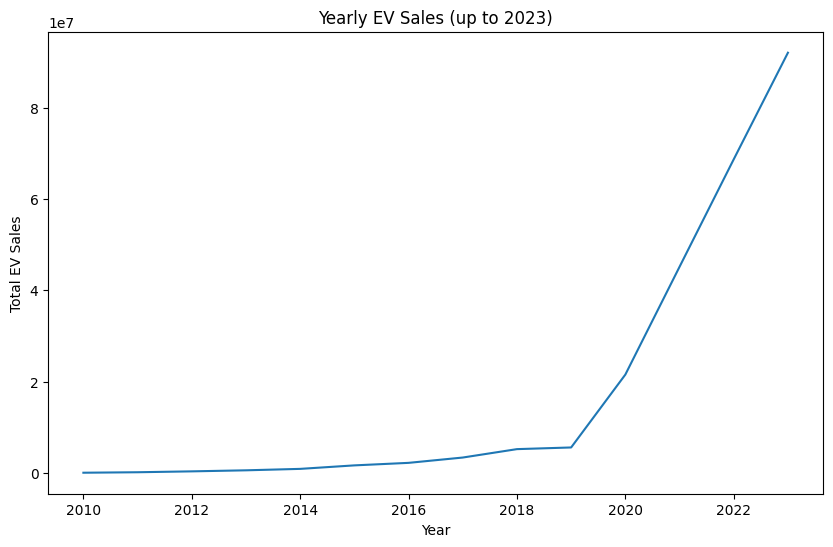

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

# PostgreSQL 데이터베이스 연결
engine = create_engine('postgresql://jeongjanghun@localhost:5432/mydatabase')

# 쿼리 실행하여 2023년까지의 데이터 가져오기
query = """
SELECT year, SUM(value) AS total_ev_sales
FROM ev_data
WHERE parameter = 'EV sales' AND year <= 2023
GROUP BY year
ORDER BY year;
"""
df = pd.read_sql_query(query, engine)

# 시각화
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='year', y='total_ev_sales')
plt.title('Yearly EV Sales (up to 2023)')
plt.xlabel('Year')
plt.ylabel('Total EV Sales')
plt.show()


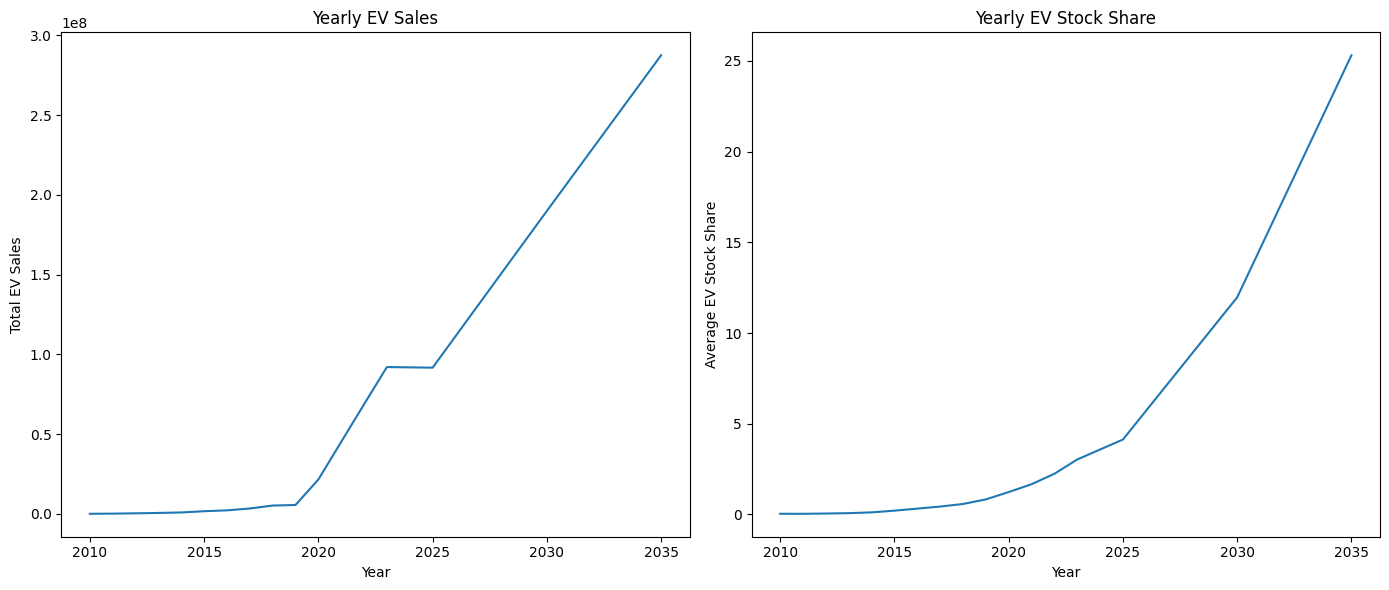

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

# PostgreSQL 데이터베이스 연결
engine = create_engine('postgresql://jeongjanghun@localhost:5432/mydatabase')

# 연도별 EV 판매량 추이
query_sales = """
SELECT year, SUM(value) AS total_ev_sales
FROM ev_data
WHERE parameter = 'EV sales'
GROUP BY year
ORDER BY year;
"""
df_sales = pd.read_sql_query(query_sales, engine)

# 연도별 EV 보급률 추이
query_stock_share = """
SELECT year, AVG(value) AS avg_ev_stock_share
FROM ev_data
WHERE parameter = 'EV stock share'
GROUP BY year
ORDER BY year;
"""
df_stock_share = pd.read_sql_query(query_stock_share, engine)

# 시각화
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.lineplot(data=df_sales, x='year', y='total_ev_sales')
plt.title('Yearly EV Sales')
plt.xlabel('Year')
plt.ylabel('Total EV Sales')

plt.subplot(1, 2, 2)
sns.lineplot(data=df_stock_share, x='year', y='avg_ev_stock_share')
plt.title('Yearly EV Stock Share')
plt.xlabel('Year')
plt.ylabel('Average EV Stock Share')

plt.tight_layout()
plt.show()


What the Graphs Indicate
Rapid Growth of the Electric Vehicle Market: Both graphs demonstrate a significant increase in electric vehicle (EV) sales and stock share over time. This indicates that EVs are becoming a dominant mode of transportation in the future.

Impact of Policies and Technological Advancements: The sharp rise in both sales and stock share likely reflects the influence of government policy support, technological advancements, and the expansion of infrastructure. These factors have likely played a crucial role in accelerating the adoption of EVs.

Future Outlook: The data beyond 2025 includes projections, offering valuable insights into how the EV market might develop. For example, the significant surge in sales after 2030 could be associated with various countries' carbon neutrality goals and the global shift towards sustainable transportation.

Conclusion
These graphs suggest that the EV market has moved beyond its initial stages and is entering a phase of substantial growth. This growth implies that related industries, such as battery manufacturing, charging infrastructure, and software development, are likely to see considerable expansion. Additionally, it suggests that EVs are on track to become a significant force in the global automotive market.

/var/folders/m2/pz__cp294tj0b4z06h0gc4wr0000gn/T/ipykernel_3545/2082387120.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_region_sales, x='total_ev_sales', y='region', palette='viridis')


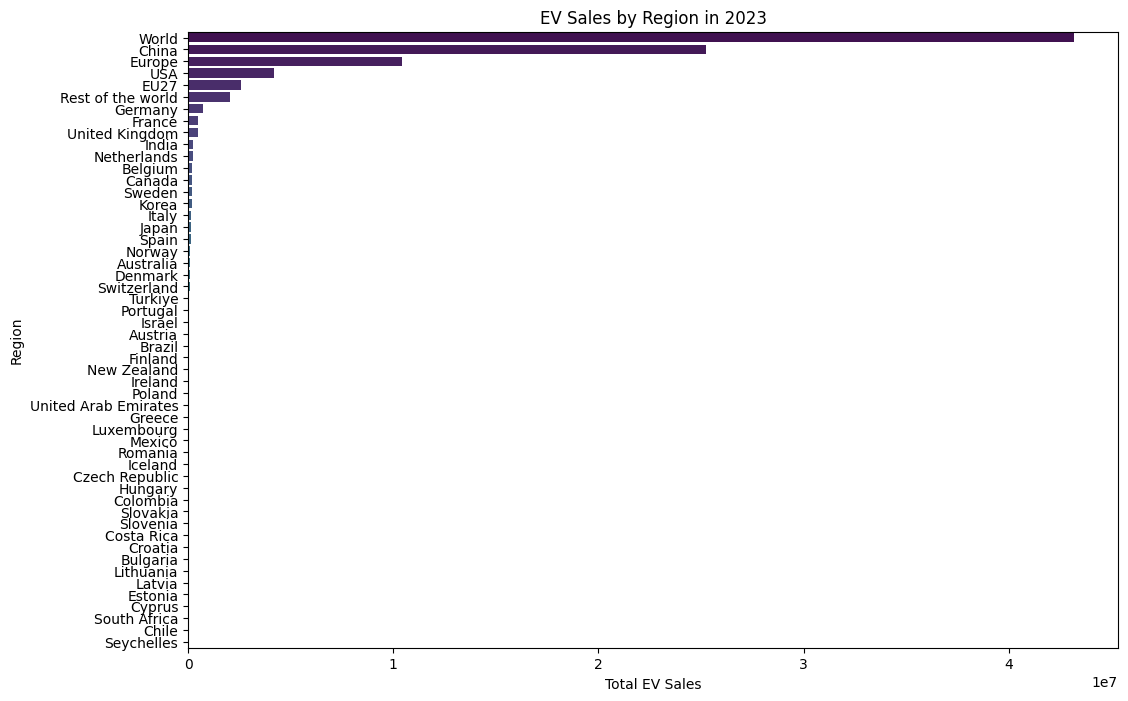

In [17]:
# 2023년 지역별 EV 판매량 비교
query_region_sales = """
SELECT region, SUM(value) AS total_ev_sales
FROM ev_data
WHERE parameter = 'EV sales' AND year = 2023
GROUP BY region
ORDER BY total_ev_sales DESC;
"""
df_region_sales = pd.read_sql_query(query_region_sales, engine)

# 시각화
plt.figure(figsize=(12, 8))
sns.barplot(data=df_region_sales, x='total_ev_sales', y='region', palette='viridis')
plt.title('EV Sales by Region in 2023')
plt.xlabel('Total EV Sales')
plt.ylabel('Region')
plt.show()


### Graph Analysis

1. **Comparison of Global and Regional Sales**:
   - **World**: The global EV sales figure is the highest on the chart, representing the total sales across all regions. This figure sums up the sales from all individual regions.
   - **China**: China leads as the largest EV market among individual countries, contributing significantly to global EV sales. This indicates that China plays a dominant role in EV production and adoption worldwide.
   - **Europe** and **EU27**: Both the entire European region and the EU27 countries show high EV sales. This reflects Europe's strong commitment to EV adoption, driven by environmental regulations and supportive policies.
   - **USA**: The United States also records substantial EV sales, highlighting its significant role in the global EV market.

2. **Other Regions**:
   - **Rest of the world**: This category includes all other countries not specifically listed, indicating that EV sales are occurring across a wide range of regions, even outside the major markets.
   - **Germany, France, United Kingdom**: These leading European countries are key contributors to the region's overall EV sales, showing that they are driving the adoption of EVs within Europe.
   - **India, Japan, Korea**: These major Asian countries also play an important role in the EV market, with Japan and Korea being particularly noteworthy for their technological advancements in the industry.

3. **Relatively Smaller Markets**:
   - **Turkey, Brazil, Mexico**: These countries have smaller EV markets compared to the global leaders, but they show potential for growth as EV adoption continues to spread globally.

### Key Insights

1. **China’s Dominant Market Size**:
   - China stands out as the largest EV market globally, with sales far surpassing those of other countries. This highlights China’s leadership in EV production, adoption, and policy support on a global scale.

2. **Strong European Market**:
   - Europe is heavily investing in EV adoption, driven by environmental regulations and carbon neutrality goals. Major countries like Germany, France, and the UK are at the forefront of this push, contributing significantly to the region’s overall EV sales.

3. **Significant Presence of the United States**:
   - The United States also plays a crucial role in the EV market, with substantial sales figures. States like California are leading the way in EV adoption, and companies like Tesla are driving growth in the US market.

4. **Growth Potential in Other Markets**:
   - Other regions, particularly in Asia (India, Japan, Korea), are showing growing EV sales and have the potential to become major players in the EV market in the coming years.

### Conclusion

This graph provides a clear picture of the global EV market as of 2023, highlighting the dominance of China, the strength of the European and US markets, and the potential for growth in other regions. This data offers valuable insights into where the EV industry should focus its efforts and how strategies might be developed to expand the market further.


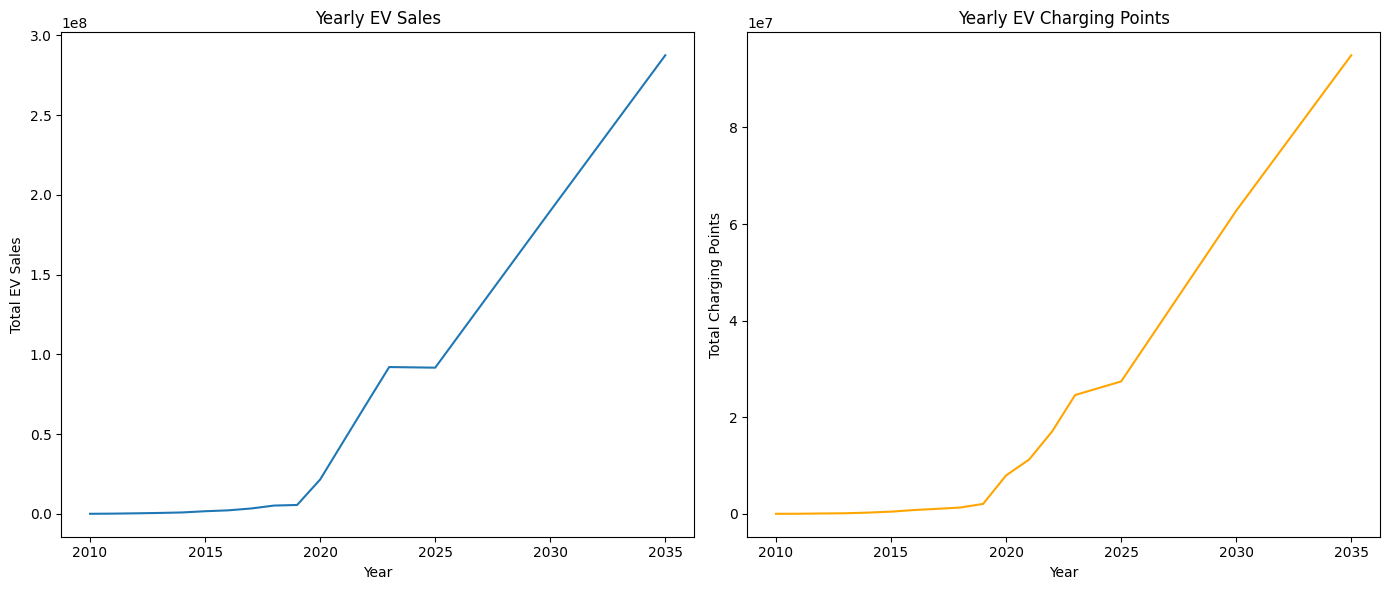

In [18]:
# 연도별 EV 판매량 및 충전소 수 추이
query_correlation = """
SELECT year, 
       SUM(CASE WHEN parameter = 'EV sales' THEN value ELSE 0 END) AS total_ev_sales,
       SUM(CASE WHEN parameter = 'EV charging points' THEN value ELSE 0 END) AS total_charging_points
FROM ev_data
WHERE parameter IN ('EV sales', 'EV charging points')
GROUP BY year
ORDER BY year;
"""
df_correlation = pd.read_sql_query(query_correlation, engine)

# 시각화
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.lineplot(data=df_correlation, x='year', y='total_ev_sales')
plt.title('Yearly EV Sales')
plt.xlabel('Year')
plt.ylabel('Total EV Sales')

plt.subplot(1, 2, 2)
sns.lineplot(data=df_correlation, x='year', y='total_charging_points', color='orange')
plt.title('Yearly EV Charging Points')
plt.xlabel('Year')
plt.ylabel('Total Charging Points')

plt.tight_layout()
plt.show()


### Analysis of Yearly EV Sales and Charging Points

This visualization presents two important metrics related to the electric vehicle (EV) market: **Yearly EV Sales** (left) and **Yearly EV Charging Points** (right). By examining these two graphs, we can gain insights into the growth of the EV market and understand the relationship between EV sales and charging infrastructure.

#### **Left Graph: Yearly EV Sales**
- **Content**: This graph shows the total number of EVs sold worldwide each year.
- **Analysis**:
  - There is a sharp increase in EV sales starting from 2020.
  - Particularly after 2025, the sales figures rise even more steeply, indicating that EVs are becoming increasingly mainstream.
  - This surge likely reflects the impact of several factors, including technological advancements, supportive government policies, and growing environmental awareness, which have significantly boosted the demand for EVs.

#### **Right Graph: Yearly EV Charging Points**
- **Content**: This graph shows the total number of EV charging points installed each year.
- **Analysis**:
  - The charging infrastructure has expanded rapidly, especially after 2020.
  - The growth rate of charging points after 2025 is similar to or even faster than the growth rate of EV sales.
  - This expansion reflects the critical need for charging infrastructure as EV adoption increases, showing that the growth in charging stations is essential to support the rising demand for EVs.

#### **Relationship Between the Two Graphs**
- **Interdependency**:
  - There is a clear interdependency between EV sales and the expansion of charging infrastructure. Without sufficient charging points, widespread adoption of EVs would be challenging, and conversely, without growing demand for EVs, the expansion of charging infrastructure might slow down.
  - The similar patterns observed in both graphs indicate that the availability of charging infrastructure is facilitating the increase in EV sales, while the growing EV market is driving the need for more charging stations.

- **Future Outlook**:
  - The steep increase in both EV sales and charging points after 2025 suggests that EVs will become even more mainstream, with charging infrastructure rapidly expanding to meet this demand.
  - This trend is likely driven by government policies, stricter environmental regulations, and an increase in consumer demand for EVs.

### **Conclusion**
These graphs illustrate the interconnected growth of the EV market and the necessary expansion of charging infrastructure. As EV adoption accelerates, the development of charging stations is crucial to sustaining this growth, indicating that EVs are well on their way to becoming a dominant mode of transportation in the future.

If you need further analysis or additional visualizations, feel free to ask!


/var/folders/m2/pz__cp294tj0b4z06h0gc4wr0000gn/T/ipykernel_3545/536174829.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_powertrain_sales, x='total_sales', y='powertrain', palette='coolwarm')


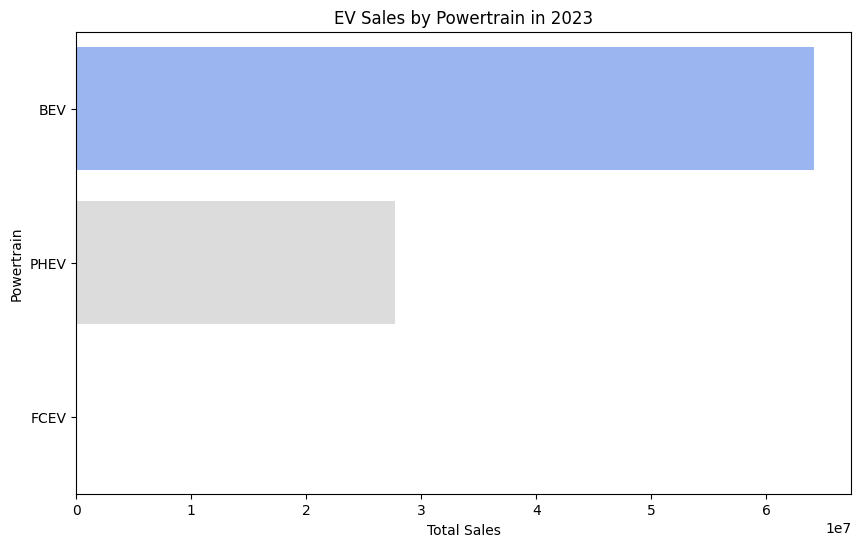

In [20]:
# 파워트레인 유형별 2023년 EV 판매량 비교
query_powertrain_sales = """
SELECT powertrain, SUM(value) AS total_sales
FROM ev_data
WHERE parameter = 'EV sales' AND year = 2023
GROUP BY powertrain
ORDER BY total_sales DESC;
"""
df_powertrain_sales = pd.read_sql_query(query_powertrain_sales, engine)

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(data=df_powertrain_sales, x='total_sales', y='powertrain', palette='coolwarm')
plt.title('EV Sales by Powertrain in 2023')
plt.xlabel('Total Sales')
plt.ylabel('Powertrain')
plt.show()


### Analysis of EV Sales by Powertrain in 2023

This bar chart illustrates the sales distribution of electric vehicles (EVs) by powertrain type in 2023.

- **BEV (Battery Electric Vehicle)**: 
  - BEVs dominate the EV market, with significantly higher sales compared to other powertrain types. This suggests a strong consumer preference for fully electric vehicles, likely driven by advancements in battery technology and the expansion of charging infrastructure.

- **PHEV (Plug-in Hybrid Electric Vehicle)**:
  - PHEVs also account for a substantial portion of the market, though their sales are lower than BEVs. PHEVs are popular for offering the flexibility of both electric and gasoline power, appealing to consumers concerned about range limitations.

- **FCEV (Fuel Cell Electric Vehicle)**:
  - FCEVs have the lowest sales, indicating limited market adoption. This could be due to the current lack of hydrogen refueling infrastructure and higher costs compared to BEVs and PHEVs.

### Conclusion
BEVs are leading the market, reflecting a shift towards fully electric vehicles, while PHEVs maintain a significant presence. FCEVs, however, remain a niche market, likely due to infrastructure challenges.


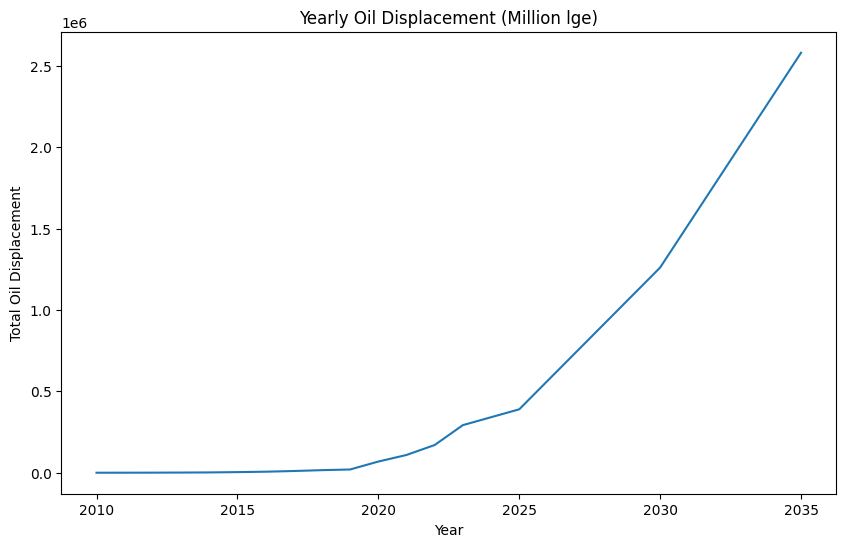

In [21]:
# 연도별 연료 절감량 분석
query_oil_displacement = """
SELECT year, SUM(value) AS total_oil_displacement
FROM ev_data
WHERE parameter = 'Oil displacement, million lge'
GROUP BY year
ORDER BY year;
"""
df_oil_displacement = pd.read_sql_query(query_oil_displacement, engine)

# 시각화
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_oil_displacement, x='year', y='total_oil_displacement')
plt.title('Yearly Oil Displacement (Million lge)')
plt.xlabel('Year')
plt.ylabel('Total Oil Displacement')
plt.show()


### Analysis of Yearly Oil Displacement (Million lge)

This graph illustrates the yearly oil displacement, measured in million liters of gasoline equivalent (lge), over time.

- **Content**:
  - The graph shows a significant increase in oil displacement starting around 2020 and accelerating rapidly after 2025.

- **Analysis**:
  - The initial slow growth phase until around 2020 suggests that the early adoption of electric vehicles (EVs) had a relatively minor impact on oil displacement.
  - However, from 2020 onwards, there is a noticeable increase in oil displacement, indicating that as EV adoption grows, the reduction in gasoline consumption becomes more substantial.
  - The sharp rise after 2025 likely reflects a combination of increasing EV adoption rates, advancements in EV technology, and possibly stricter environmental regulations pushing for reduced fossil fuel use.

- **Future Outlook**:
  - The steep upward trend beyond 2025 suggests that as EV adoption continues to grow, the displacement of oil will have a more significant impact on reducing global gasoline consumption.
  - This trend is critical for achieving global carbon reduction goals and highlights the importance of continuing to support the transition from traditional gasoline-powered vehicles to EVs.

### Conclusion
This graph demonstrates the growing impact of electric vehicles on reducing gasoline consumption, particularly as their adoption accelerates. The continued rise in oil displacement is a positive indicator of the progress being made towards more sustainable transportation and energy use.
